In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
processed_data = np.load('Full_array.npy')

In [5]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import pandas as pd

In [54]:
number = 9166
processed_data = processed_data[0:number]

In [55]:
galaxyzoo = pd.read_csv("zoo2MainSpecz.csv/zoo2MainSpecz.csv", usecols=[2,3,4,8], nrows=number)
Class = galaxyzoo["gz2class"].values

In [ ]:
# we need to interpret the class as 0=spiral, 1=elliptical, 2=other
#S = 0
#E = 1
#A = 2

In [19]:
dictionary = {'A':int(2),'E':int(1),'S':int(0)}
dictionary['A']


2

In [58]:
target = np.empty((len(Class)))
for i in range(len(Class)):
    target[i] = int(dictionary[Class[i][0]])
#print(processed_data[999])

In [59]:
train_target = target[0:8000]
test_target = target[8000:number]
train_images = processed_data[0:8000]
test_images = processed_data[8000:number]

In [62]:
#train_images = train_images.reshape(900,28,28)
#test_images = test_images.reshape(100,28,28)
print(np.shape(train_images))

(8000, 28, 28)


In [78]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [79]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [80]:
model.fit(train_images, train_target, epochs=5)

Epoch 1/5
8000/8000 [==============================] - 1s 183us/step - loss: 0.7611 - acc: 0.6946
Epoch 2/5
8000/8000 [==============================] - 1s 121us/step - loss: 0.6431 - acc: 0.7201
Epoch 3/5
8000/8000 [==============================] - 1s 123us/step - loss: 0.6238 - acc: 0.7228
Epoch 4/5
8000/8000 [==============================] - 1s 119us/step - loss: 0.5852 - acc: 0.7395
Epoch 5/5
8000/8000 [==============================] - 1s 126us/step - loss: 0.5461 - acc: 0.7632


In [81]:
test_loss, test_acc = model.evaluate(test_images, test_target)

print('Test accuracy:', test_acc)

1166/1166 [==============================] - 0s 251us/step
Test accuracy: 0.7710120067588256


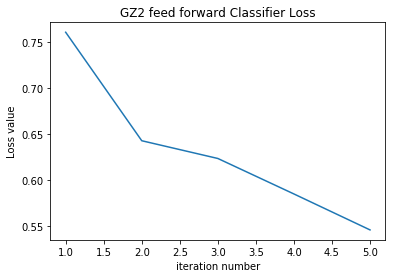

In [3]:
loss = np.array([0.7611,0.6431,0.6238,0.5852,0.5461])
iteration = np.array([1,2,3,4,5])
plt.title("GZ2 feed forward Classifier Loss")
plt.xlabel("iteration number")
plt.ylabel("Loss value")
plt.plot(iteration, loss)

In [88]:
#nice it worked?
#I wonder how it would work if I guessed all spherical.
f = 0
for i in range(len(test_target)):
    if test_target[i] == 0:
        f = f+1
print(f/len(test_target))

0.5737564322469982
